# GERMAN_CREDIT_RISK_PREDICTION

# DOMAIN JUSTIFICATION
I chose the BFSI (Banking, Financial Services, and Insurance) domain due to my passion for finance and banking, coupled with its booming market demand. As a commerce student, I have a solid understanding of financial concepts, making BFSI a natural fit. With BFSI undergoing rapid technological advancements and generating vast amounts of data, I see an opportunity to leverage data science for valuable insights, such as fraud detection and risk assessment, contributing to informed decision-making in the industry.


# APPROACHES:

#  CHALLENGES FACED

# TARGET VARIABLE
The target variable for this machine learning project is "Risk", which indicates whether the credit risk is "good" or "bad".


# DATA_SET:[GERMEN_CREDIT_RISK]
The dataset comprises demographic and financial information of individuals applying for loans, including age, sex, job, housing status, savings, checking account balances, credit amount, loan duration, purpose of the loan, and risk assessment with 1000 rows and 11 columns. Each entry represents a unique applicant, providing insights into factors influencing loan approval and risk evaluation within the banking and financial services sector.






# IMPORTING MODELS

In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

# DATA OVERVIEW

# LOADING THE DATA



In [3]:
import pandas as pd

df = pd.read_csv('C:\\Users\\Shiva\\Downloads\\gernenn_credit.csv', encoding='ascii')


# EDA(EXPLORATORY DATA ANALYSIS)

In [4]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.shape

(1000, 11)

In [6]:
df.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
df.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
Risk                object
dtype: object

In [8]:
#remove unwanted coloum or filter the required column
df = df.drop(df.columns[0], axis=1)


In [9]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


Data Cleaning and Outlier Removal:
--------------------------------------------------
Next, I will clean the data by handling missing values and removing outliers, particularly in the 'Credit amount' and 'Duration'
columns,as these are crucial for our analysis and model accuracy.

In [10]:
# Handling missing values
missing_values = df.isnull().sum()
print('Missing values before handling:\n', missing_values)


Missing values before handling:
 Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


In [11]:
#checking how much % of null values present in data:
(183/len(df))*100
(394/len(df))*100

39.4

In [12]:
# Filling missing values
# For categorical data, we use the mode (most frequent)
df['Saving accounts'].fillna(df['Saving accounts'].mode()[0], inplace=True)
df['Checking account'].fillna(df['Checking account'].mode()[0], inplace=True)

In [13]:
# Checking missing values after handling
missing_values_after = df.isnull().sum()
print('Missing values after handling:\n', missing_values_after)

Missing values after handling:
 Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64


# Visualizing Outliers in Numerical Variables: Box Plot

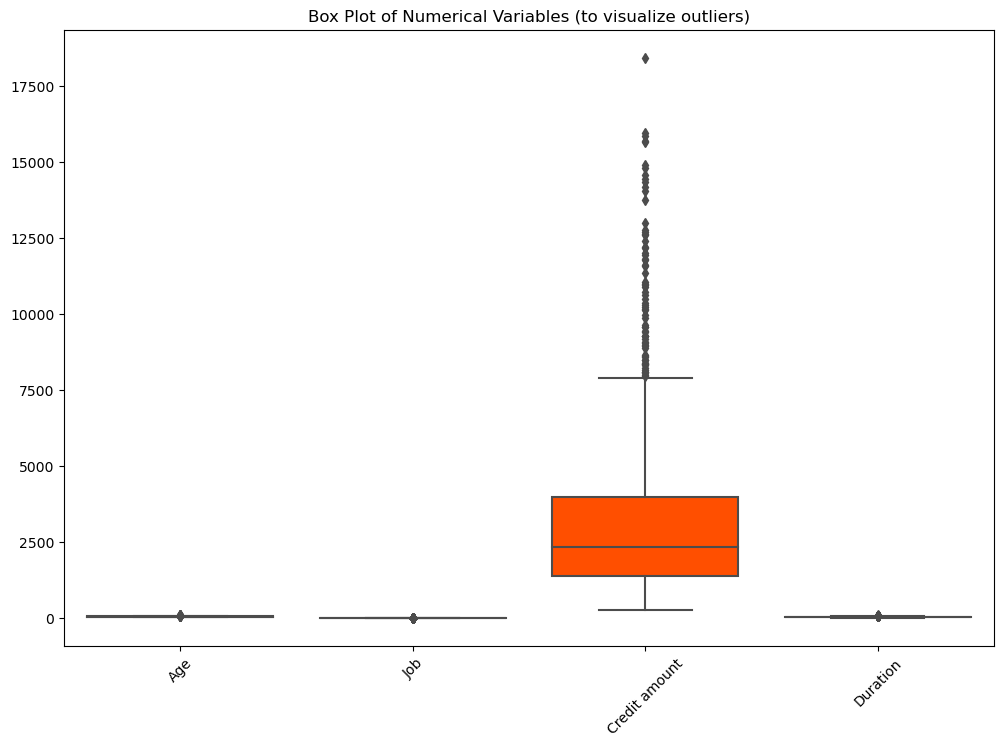

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Setting up the figure size
plt.figure(figsize=(12, 8))

# Creating the box plot with the specified colors
sns.boxplot(data=df[numerical_columns], color='#FF8C00', boxprops=dict(facecolor='#FF4F00'))

# Rotating x-axis labels for better readability
plt.xticks(rotation=45)

# Adding title
plt.title("Box Plot of Numerical Variables (to visualize outliers)")

# Displaying the plot
plt.show()



In [15]:
# Removing outliers using IQR(inter_quartile_range)
Q1 = df['Credit amount'].quantile(0.25)
Q3 = df['Credit amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [33]:
# Filtering the data
filtered_df = df[(df['Credit amount'] >= lower_bound) & (df['Credit amount'] <= upper_bound)]
print('Data shape before removing outliers:', df.shape)
print('Data shape after removing outliers:', filtered_df.shape)

Data shape before removing outliers: (1000, 10)
Data shape after removing outliers: (928, 10)


# PLOTS(EDA)

In [17]:
# Set the aesthetic style of the plots
sns.set(style='whitegrid')

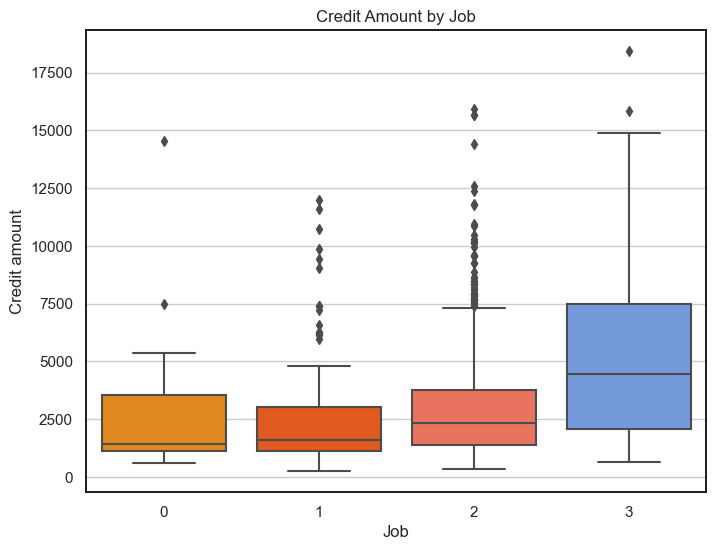

In [18]:


# Define colors
color_palette = ['#FF8C00', '#FF4F00', '#FF6347', '#6495ED']

# Plotting different variables against each other - Credit Amount by Job
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Job', y='Credit amount', data=df, ax=ax, palette=color_palette)
ax.set_title('Credit Amount by Job')
for spine in ax.spines.values():
    spine.set_edgecolor('black') 
plt.show()



CREDIT AMOUNT BY JOB:
--------------------
Different job categories show varying credit amounts, with highly skilled individuals generally requesting higher credit amounts.

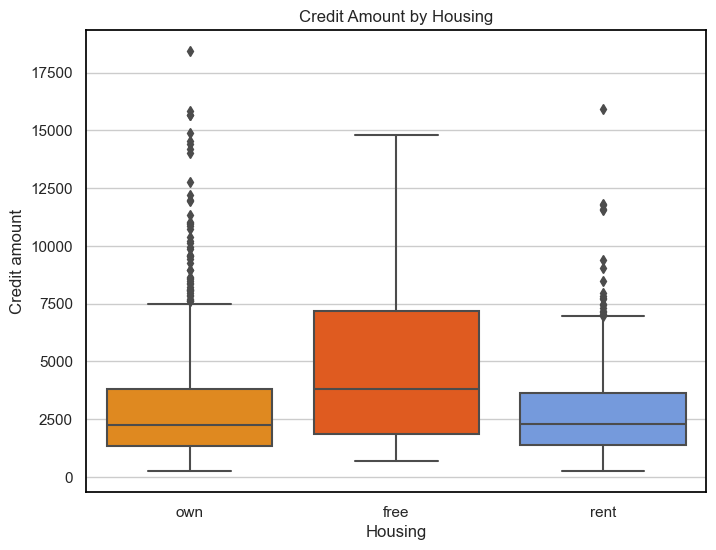

In [19]:


# Define colors
color_palette = ['#FF8C00', '#FF4F00', '#6495ED', '#FFA07A',]

# Plotting Credit Amount by Housing
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x='Housing', y='Credit amount', data=df, ax=ax, palette=color_palette)
ax.set_title('Credit Amount by Housing')
for spine in ax.spines.values():
    spine.set_edgecolor('black') 
plt.show()



Credit Amount by Housing:
------------------------
Individuals who own their homes tend to request higher credit amounts compared to those renting or living for free.

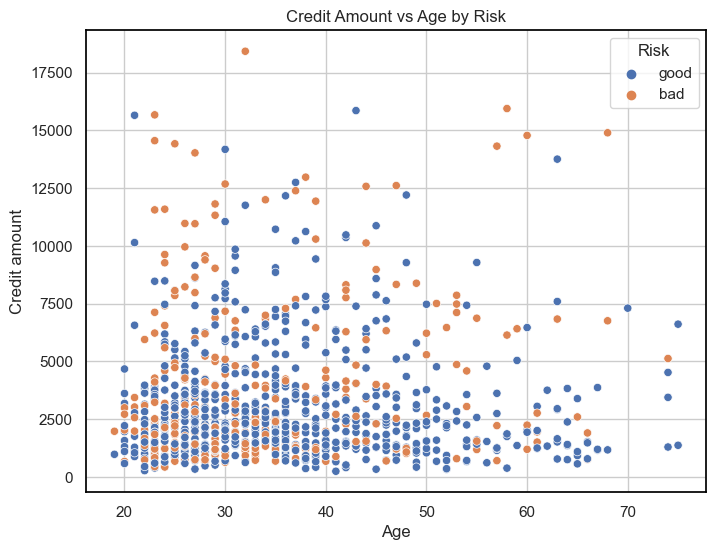

In [20]:
#CREDIT AMOUNT VS AGE BY RISK:
color_palette = ['#FF4F00', '#6495ED']  # Added a gold color which is relevant
fig, ax = plt.subplots(figsize=(8, 6))
sns.scatterplot(x='Age', y='Credit amount', hue='Risk', data=df, ax=ax)
ax.set_title('Credit Amount vs Age by Risk')
for spine in ax.spines.values():
    spine.set_edgecolor('black') 
plt.show()


Credit Amount vs Age by Risk:
-----------------------------
There's a spread across age, with no clear pattern indicating risk, but higher credit amounts tend to be concentrated in the middle-age group.

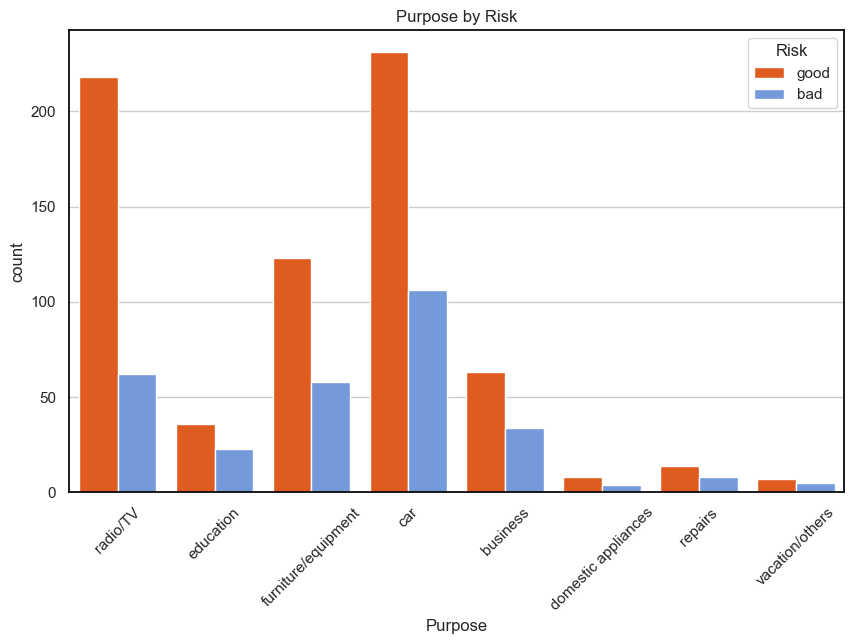

In [21]:
#PURPOSE BY RISK:
# Define colors
color_palette = ['#FF4F00', '#6495ED']  # Added a gold color which is relevant

# Plotting Purpose by Risk
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='Purpose', hue='Risk', data=df, ax=ax, palette=color_palette)
ax.set_title('Purpose by Risk')
ax.tick_params(axis='x', rotation=45)
for spine in ax.spines.values():
    spine.set_edgecolor('black') 
plt.show()


PURPOSE BY RISK:
---------------
Certain purposes like 'car' and 'radio/TV' have a higher frequency of being classified as 'good' risk.

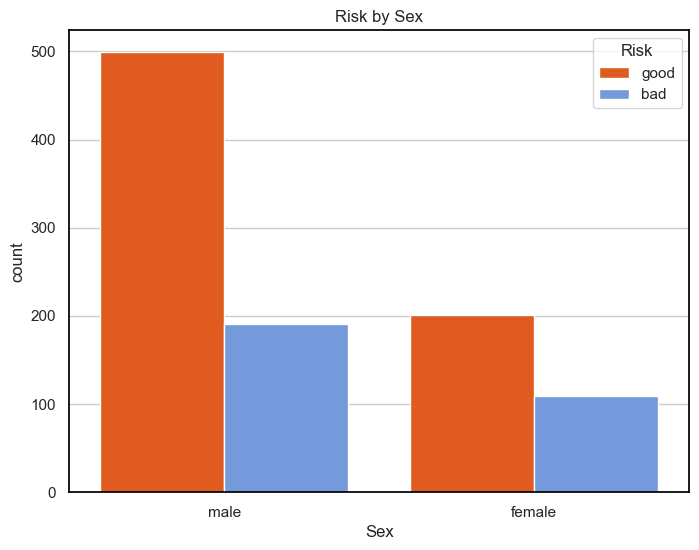

In [22]:
# RISK BY RISK:

# Define colors
color_palette = ['#FF4F00', '#6495ED']  # Two colors for two risk levels

# Plotting Risk by Sex
fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(x='Sex', hue='Risk', data=df, ax=ax, palette=color_palette)
ax.set_title('Risk by Sex')
for spine in ax.spines.values():
    spine.set_edgecolor('black') 
plt.show()




RISK BY SEX:
-------------------
Males have a slightly higher frequency of 'bad' risk compared to females.

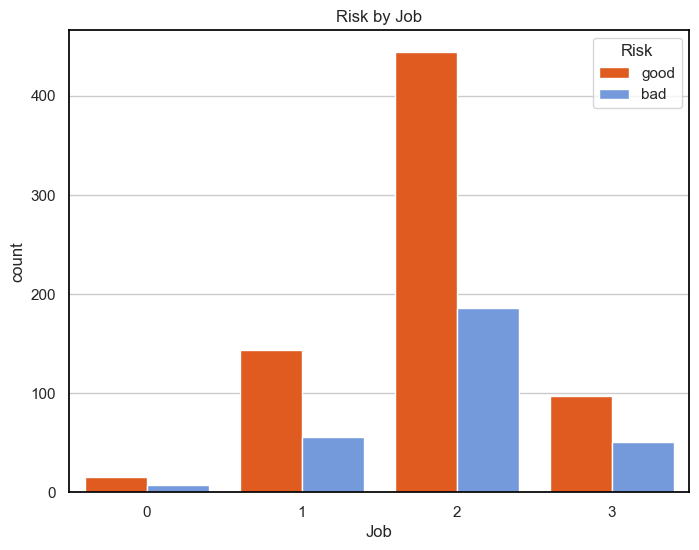

In [23]:
#RISK BY JOB:
# Define colors
color_palette = ['#FF4F00', '#6495ED']  # Four colors for four job categories

# Plotting Risk by Job
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x='Job', hue='Risk', data=df, ax=ax, palette=color_palette)
ax.set_title('Risk by Job')
for spine in ax.spines.values():
    spine.set_edgecolor('black') 
plt.show()


RISK  BY JOB:
------------
Skilled workers have a higher count of both 'good' and 'bad' risk, but the proportion of 'bad' risk is notably
higher in unskilled residents.

# now we completed all the preprocessing step now it is ready to fit in a model:

# MODEL

Splitting of the datset:
-------------------------------

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
encoder = LabelEncoder()
for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']:
    filtered_df[column] = encoder.fit_transform(filtered_df[column])

# Splitting the dataset
X = filtered_df.drop('Risk', axis=1)
y = filtered_df['Risk']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)

Training set shape: (788, 9)
Testing set shape: (140, 9)


# SELECTION_OF_MODEL(1)

In [25]:
# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print('Logistic Regression Accuracy:', accuracy_log_reg)
print('Classification Report:\n', report_log_reg)

Logistic Regression Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.20      0.31        40
           1       0.75      0.97      0.85       100

    accuracy                           0.75       140
   macro avg       0.74      0.58      0.58       140
weighted avg       0.74      0.75      0.69       140



Logistic Regression Accuracy: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.20      0.31        40
           1       0.75      0.97      0.85       100

    accuracy                           0.75       140
   macro avg       0.74      0.58      0.58       140
weighted avg       0.74      0.75      0.69       140



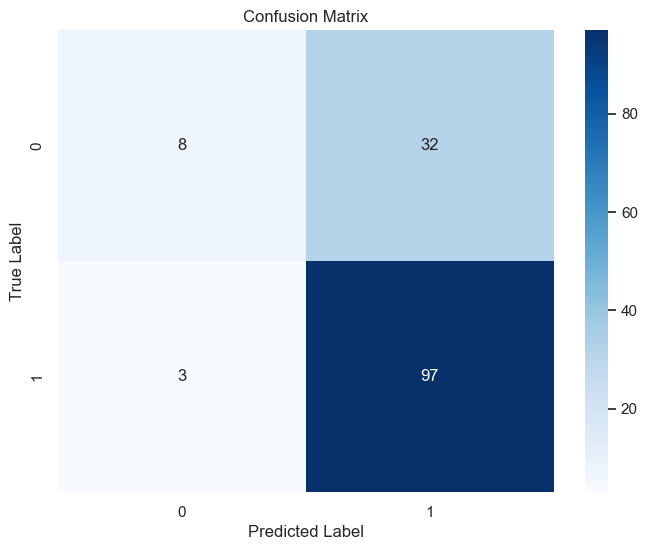

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Logistic Regression Model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Evaluating the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print('Logistic Regression Accuracy:', accuracy_log_reg)
print('Classification Report:\n', report_log_reg)

# Plotting the confusion matrix
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)

plt.figure(figsize=(8, 6), facecolor='white')
plt.title('Confusion Matrix')
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


reasons for choosing logistic regression
----------------------------------------------------------
1)Logistic regression is a simple and widely used classification algorithm, especially when dealing with binary outcomes like
"good" or "bad" risk in your dataset.

2)It provides a probabilistic interpretation of the outcomes, which can be useful in understanding the confidence of predictions.

3)Logistic regression is computationally efficient and easy to implement, making it a good choice for initial exploration
of the data and as a baseline model.

# SELECTION_OF_MODEL(2)

Decision Tree Accuracy: 0.5928571428571429
Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.33      0.31        40
           1       0.72      0.70      0.71       100

    accuracy                           0.59       140
   macro avg       0.51      0.51      0.51       140
weighted avg       0.60      0.59      0.60       140



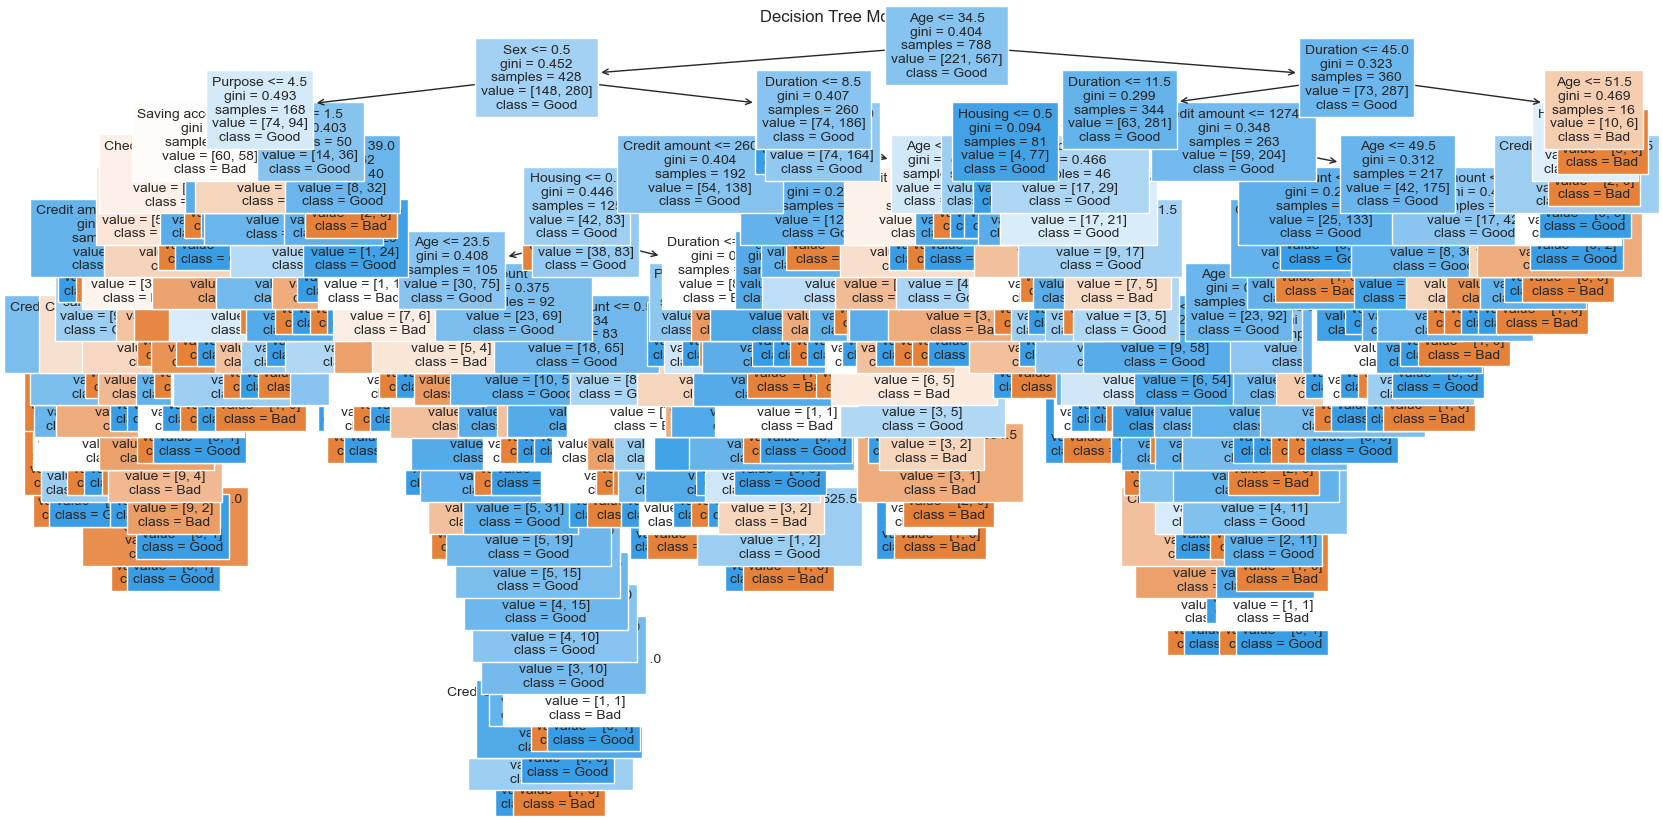

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.30      0.33      0.31        40
           1       0.72      0.70      0.71       100

    accuracy                           0.59       140
   macro avg       0.51      0.51      0.51       140
weighted avg       0.60      0.59      0.60       140



In [27]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Decision Tree Model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
y_pred_decision_tree = decision_tree.predict(X_test)

# Evaluating the model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
report_decision_tree = classification_report(y_test, y_pred_decision_tree)

print('Decision Tree Accuracy:', accuracy_decision_tree)
print('Classification Report:\n', report_decision_tree)

# Plotting the Decision Tree
plt.figure(figsize=(20, 10), facecolor='white')
plot_tree(decision_tree, filled=True, feature_names=X.columns.tolist(), class_names=['Bad', 'Good'], fontsize=10)
plt.title('Decision Tree Model')
plt.show()

print('Decision Tree Classification Report:\n', report_decision_tree)

reason for choosing DecisionTreeClassifier
-------------------------------------------
1)Random forest is an ensemble learning method that combines multiple decision trees to improve the predictive performance and reduce overfitting.

2)It handles non-linear relationships well and is robust to outliers and noise in the data.

3)Random forest can automatically handle feature selection by evaluating the importance of variables, which can be helpful in 3)understanding which factors are driving the predictions in your dataset.

It generally performs well without much hyperparameter tuning, making it suitable for a variety of datasets, including yours.

# COMPARISION OF MODELS:

In [28]:
from sklearn.model_selection import GridSearchCV

# Setting up parameter grid for Logistic Regression
cv_params_log_reg = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_log_reg = GridSearchCV(LogisticRegression(random_state=42), cv_params_log_reg, cv=5, scoring='accuracy')
grid_log_reg.fit(X_train, y_train)

best_params_log_reg = grid_log_reg.best_params_
best_score_log_reg = grid_log_reg.best_score_

print('Best Parameters for Logistic Regression:', best_params_log_reg)
print('Best Cross-Validated Accuracy:', best_score_log_reg)

Best Parameters for Logistic Regression: {'C': 1, 'solver': 'lbfgs'}
Best Cross-Validated Accuracy: 0.7335241473836975


In [29]:
# Setting up parameter grid for Decision Tree
cv_params_decision_tree = {'max_depth': [None, 10, 20, 30, 40], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
grid_decision_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), cv_params_decision_tree, cv=5, scoring='accuracy')
grid_decision_tree.fit(X_train, y_train)

best_params_decision_tree = grid_decision_tree.best_params_
best_score_decision_tree = grid_decision_tree.best_score_

print('Best Parameters for Decision Tree:', best_params_decision_tree)
print('Best Cross-Validated Accuracy:', best_score_decision_tree)

Best Parameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validated Accuracy: 0.678884140933645


# FINAL_MODEL

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Best parameters for Logistic Regression
best_params_log_reg = {'C': 1, 'solver': 'lbfgs'}

# Build final Logistic Regression model
final_log_reg = LogisticRegression(**best_params_log_reg, random_state=42)
final_log_reg.fit(X_train, y_train)

# Predictions
y_pred_final_log_reg = final_log_reg.predict(X_test)

# Evaluate the final Logistic Regression model
accuracy_final_log_reg = accuracy_score(y_test, y_pred_final_log_reg)
report_final_log_reg = classification_report(y_test, y_pred_final_log_reg)

print('Final Logistic Regression Accuracy:', accuracy_final_log_reg)
print('Final Classification Report:\n', report_final_log_reg)


Final Logistic Regression Accuracy: 0.75
Final Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.20      0.31        40
           1       0.75      0.97      0.85       100

    accuracy                           0.75       140
   macro avg       0.74      0.58      0.58       140
weighted avg       0.74      0.75      0.69       140



# conclusion


Logistic Regression emerged as the superior model for credit risk prediction, yielding an accuracy of 75% on the testing data,
while the Decision Tree model achieved 59.29%. After hyperparameter tuning, Logistic Regression attained a cross-validated 
accuracy of around 73.35%, surpassing the Decision Tree's 67.89%. 

Therefore, based on its higher accuracy and robustness, Logistic Regression is recommended for deployment in real-world 
scenarios for assessing credit risk in the banking and financial services sector.
